# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sadrakh Zefanya Putra
- **Email:** sadrakhxvid777@gmail.com
- **ID Dicoding:** sdrzfn

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan selama 12 bulan terakhir?
- Musim apa yang menjadi favorit pengguna untuk menyewa sepeda?
- Pada saat jam berapa penyewaan sepeda paling ramai?
- Berapa persentase pengguna yang memilih untuk registered dibandingkan dengan casual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Menampilkan data di dalam file "day.csv"
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Menampilkan data di dalam file "hour.csv"
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [4]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [5]:
# Mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
# Mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Setelah dijalankan pengecekan duplikasi dan missing values ternyata tidak ada data yang hilang maupun yang terduplikasi

In [8]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat didalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Di atas merupakan hasil statistik deskriptif dari data day.csv dan hour.csv

**Insight:**
- Data pada hour.csv dan day.csv sama-sama tidak terdapat missing values dan duplikasi setelah dilakukan pengecekan
- Terdapat 17 kolom di data day.csv
- Terdapat 16 kolom di data hour.csv
- Registered user memiliki rata-rata 153.786869 pengguna pada selang waktu satu tahun dan 89.463088 rata-rata casual user

### Cleaning Data

Dropping tabel

In [10]:
# Menghapus tabel 'workingday' dikarenakan sudah dapat diwakilkan informasinya dengan tabel 'weekday'
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

Rename Column

In [12]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'dteday':'dateday','yr':'year','mnth':'month','weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'dteday':'dateday','yr':'year','hr':'hours','mnth':'month','weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

Mengubah Tipe Data

In [13]:
# Merubah tipe data int menjadi category
columns = ['season', 'month', 'holiday', 'weekday', 'weather_situation']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")


# Mengubah tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
day_df['dateday'] = pd.to_datetime(day_df['dateday'])
hour_df['dateday'] = pd.to_datetime(hour_df['dateday'])

Mengubah isi pada Column

In [14]:
# Mengubah data isi kolom menjadi dictionaries
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
year_map = {0: '2011', 1: '2012'}

# dataFrame menggunakan map functions
day_df['season'] = day_df['season'].map(season_map)
day_df['month'] = day_df['month'].map(month_map)
day_df['weather_situation'] = day_df['weather_situation'].map(weather_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['year'] = day_df['year'].map(year_map)

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['month'] = hour_df['month'].map(month_map)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['year'] = hour_df['year'].map(year_map)

Menghitung Humidity

In [15]:
# Menghitung Humidity
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

In [16]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

**Insight:**
- Column workingday telah dihapus dan akan diwakilkan dengan column weekday yang menurut saya sudah cukup untuk analisis data lebih lanjut
- Mengubah tipe data pada kolom dteday menjadi datetime
- Mengubah tipe data int pada season, mnth, holiday, weekday, workingday, weathersit sudah berubah menjadi tipe data dictionary
- Mengganti nama kolom agar lebih mudah dibaca
- Setelah diganti menjadi dictionary, isi kolom sudah dapat dipahami dengan mudah
- Humidity telah dilakukan pengklasifikasian supaya hasilnya dapat terbaca dengan mudah

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [17]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dateday,season,year,month,hours,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [18]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


### Explore Data day_df

In [19]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [20]:
# melihat jumlah penyewaan tiap musim
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

<ipython-input-20-1ec95b9eab11>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


In [21]:
# melihat jumlah penyewaan tiap bulan berdasarkan registered dan casual
day_df.groupby(by="month").agg({
    "registered": ["sum"],
    "casual": ["sum"],
})

<ipython-input-21-4ffbe6378841>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="month").agg({


,registered,casual
,sum,sum
month,,
Jan,122891,12042
Feb,136389,14963
Mar,184476,44444
Apr,208292,60802
May,256401,75285
Jun,272436,73906
Jul,266791,78157
Aug,279155,72039


**Insight:**
- Musim Fall/gugur adalah musim yang paling banyak pelanggan untuk menyewa sepeda
- Seluruh jam di dalam satu hari selalu terdapat pengguna yang menyewa sepeda
- Menurut penghitungan persewaan bulanan, bulan Juli adalah bulan dimana total jumlah penyewa mencapai angka yang tertinggi
- Menurut statistik deskriptif pada file 'day.csv', hari minggu adalah hari yang paling sering pengguna menyewa sepeda
- Banyak pelanggan memilih untuk menyewa sepeda saat kelembapan udara di kondisi 'Ideal'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan selama 12 bulan terakhir?

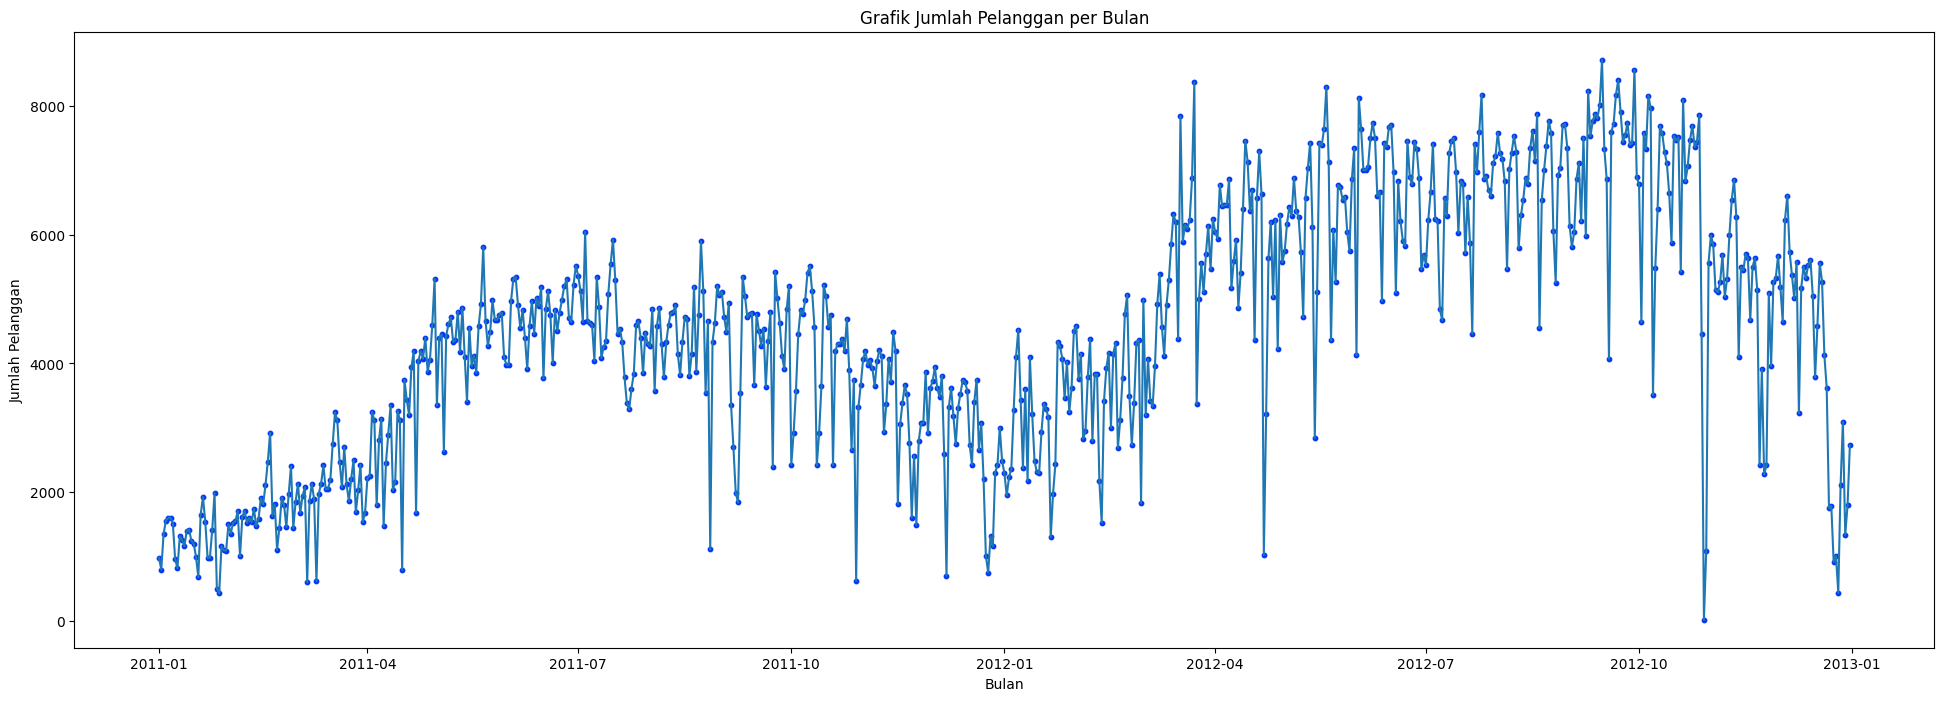

In [30]:
# mmebuat figure dengan ukuran (24, 8)
plt.figure(figsize=(24, 8))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dateday']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#0339FC", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah Pelanggan')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan')

# menampilkan plot
plt.show()

### Pertanyaan 2: Musim apa yang menjadi favorit pengguna untuk menyewa sepeda?

<ipython-input-23-e42fe4c23096>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

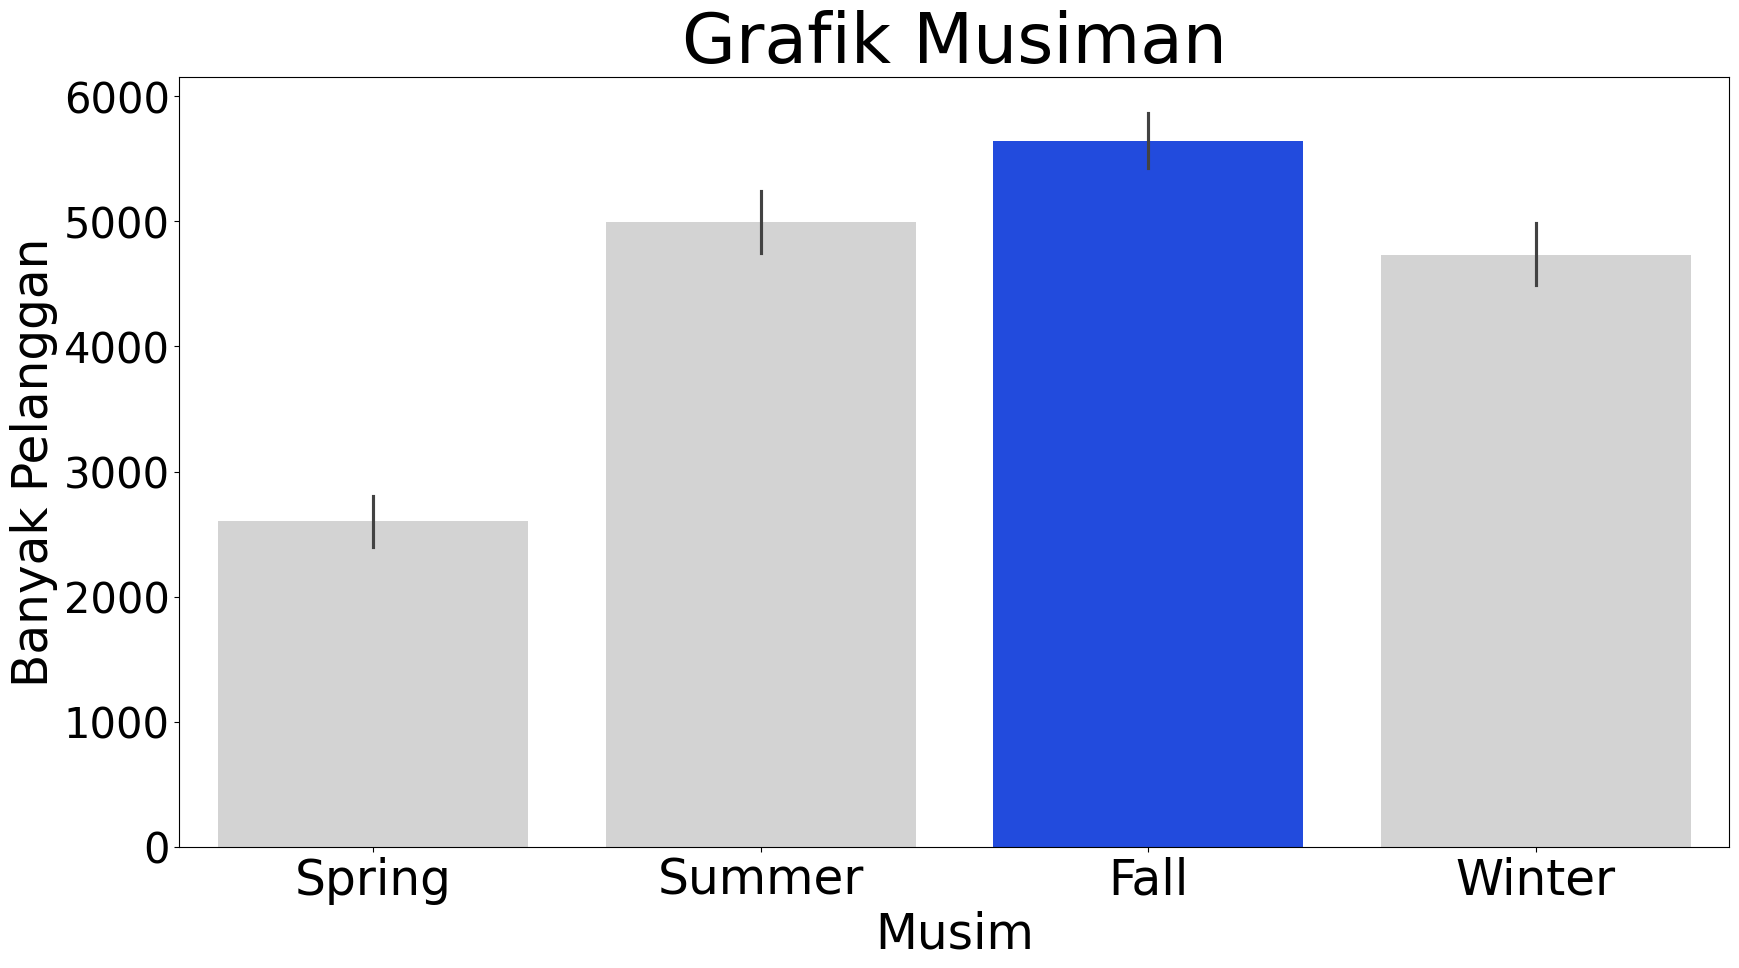

In [23]:
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#0339FC", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Musiman", loc="center", fontsize=50)
ax.set_ylabel("Banyak Pelanggan", loc="center", fontsize=35)
ax.set_xlabel("Musim", loc="center", fontsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

### Pertanyaan 3: Pada saat jam berapa penyewaan sepeda paling ramai pengguna?

<ipython-input-24-ea11d2821628>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(24), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


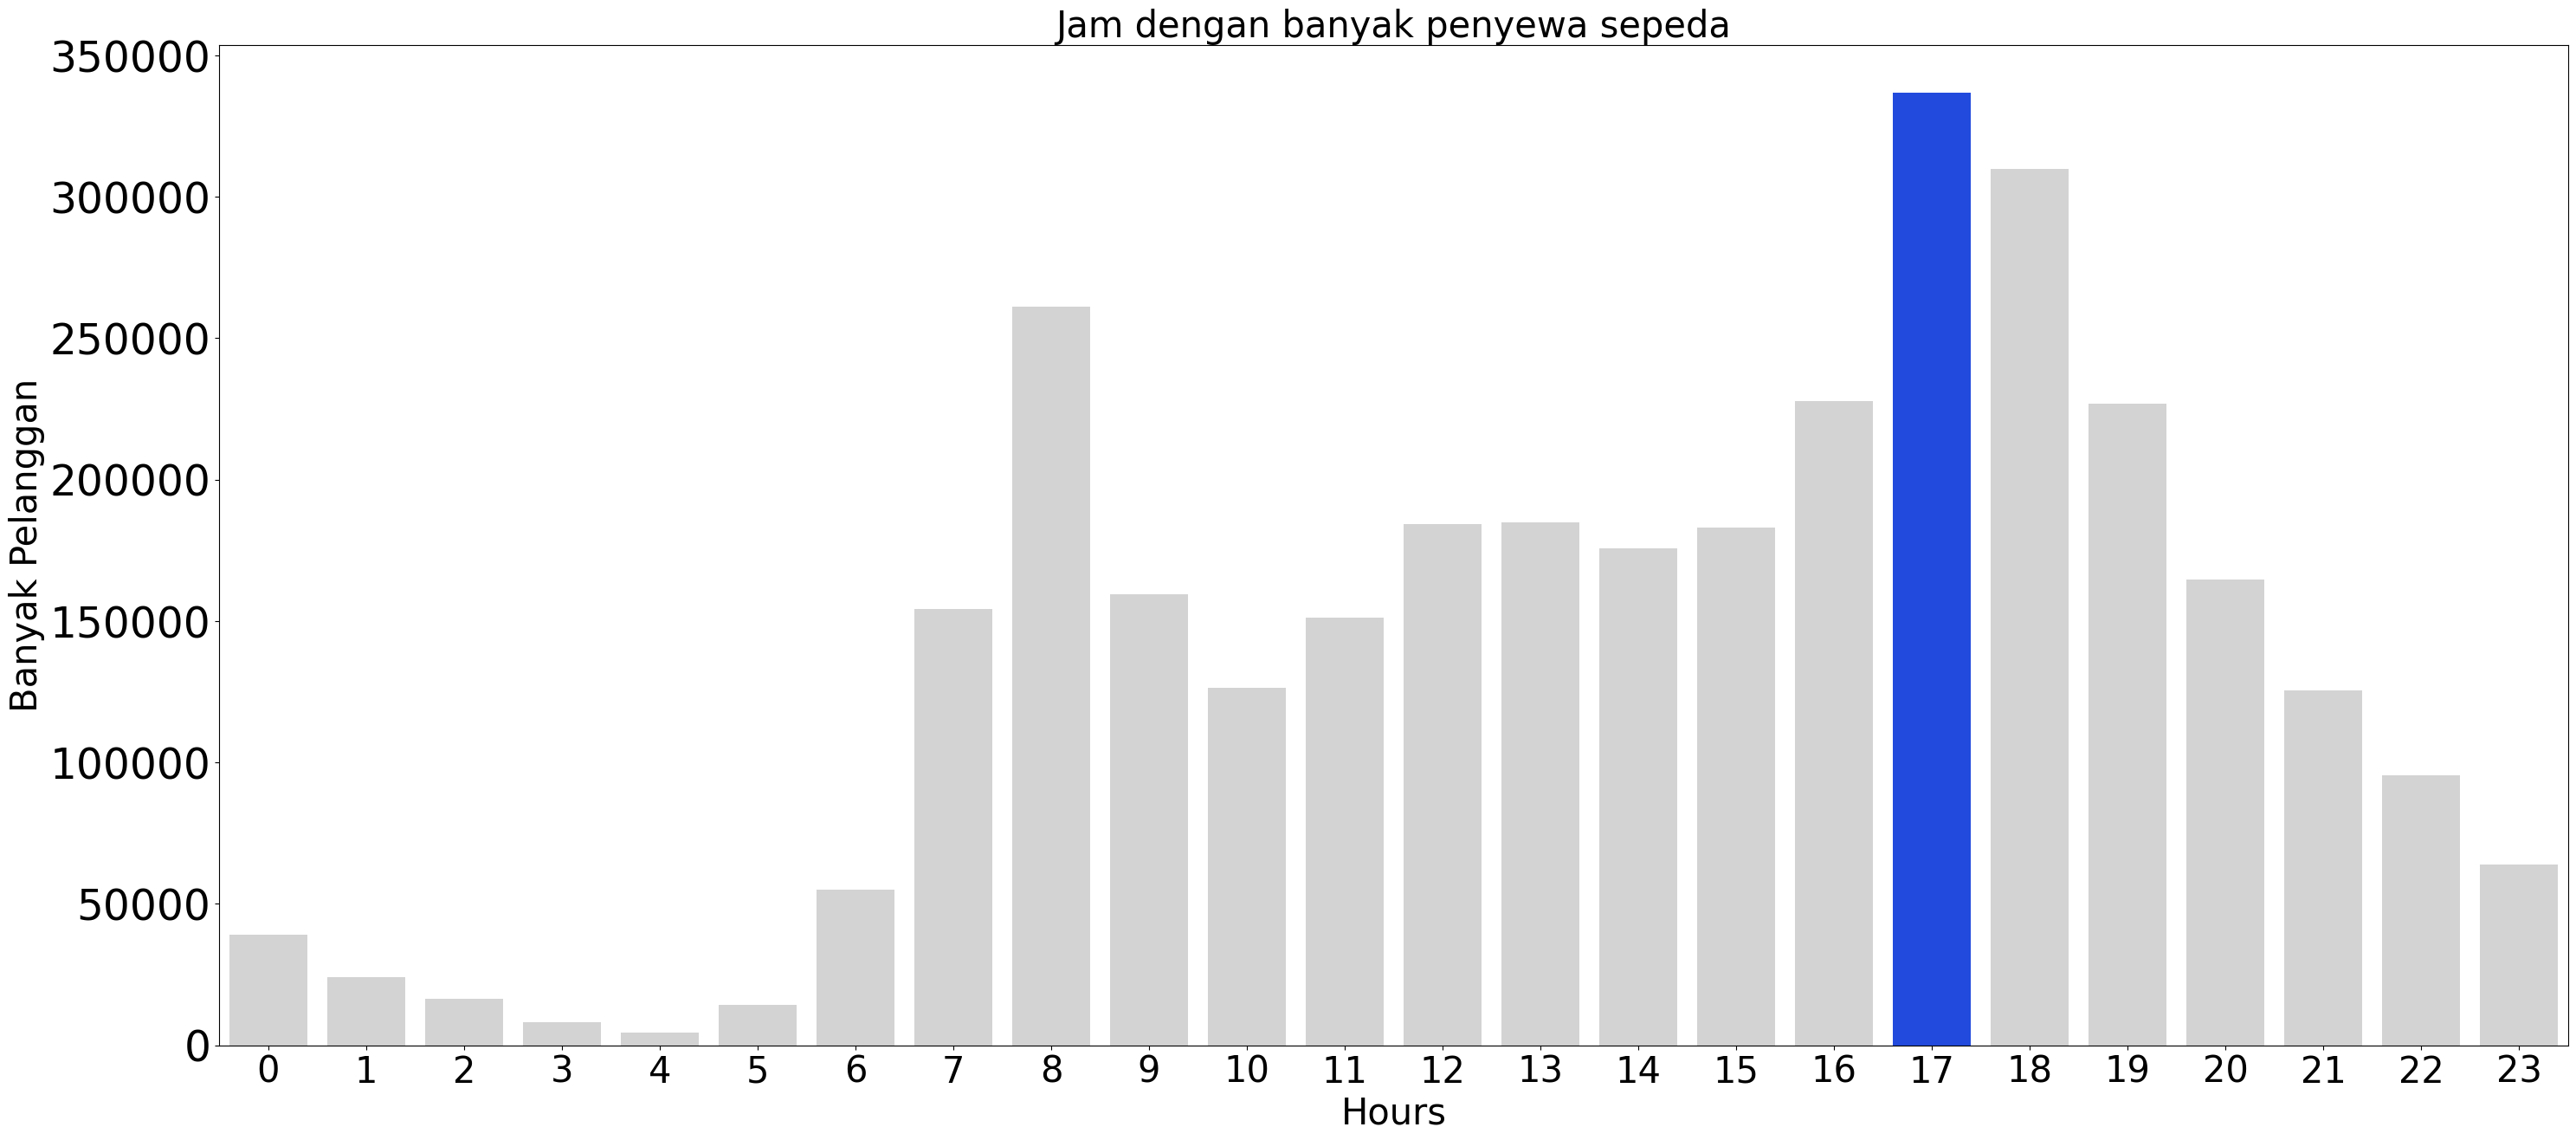

In [24]:
# melakukan grouping terhadap hours dan count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(24), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
                                                                                "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3",
                                                                                "#D3D3D3", "#0339FC", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=ax)

# mengatur label dan judul untuk subplot pertama
ax.set_ylabel("Banyak Pelanggan", fontsize=30)
ax.set_xlabel("Hours", fontsize=30)
ax.set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()

### Pertanyaan 4: Berapa persentase pengguna yang memilih untuk registered dibandingkan dengan casual?

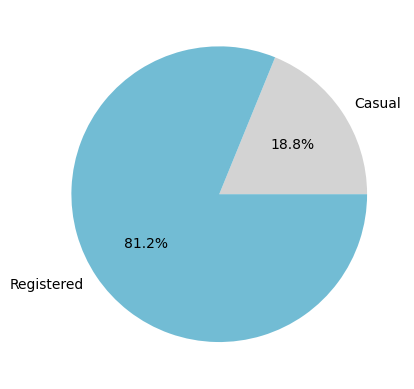

In [25]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

**Insight:**
- Selama 12 bulan terjadi fluktuasi pengguna yang mengakibatkan grafik naik turun
- Musim yang paling sering menjadi waktu untuk menyewa sepeda adalah musim gugur
- Jam yang paling ramai pengguna adalah jam 17.00
- Persentase registered user adalah 81.2% dan casual user sebanyak 18.8%

## Analisis Lanjutan (Opsional)

### 1.   Analisis Clustering



Analisis Clustering yang akan dilakukan adalah analisis mengenai keterkaitan banyak pengguna persewaan sepeda dengan kondisi cuaca.

In [26]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

<ipython-input-26-89d5da45a76e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


,count_cr
weather_situation,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


Dapat ditarik kesimpulan bahwa jumlah pengguna akan mengalami peningkatan jika cuaca pada hari itu sedang cuaca cerah. Pengguna akan menghindari menggunakan jasa persewaan sepeda pada saat hujan salju berat.

### 2.   RFM Analysis



RFM Analysis dilakukan untuk memahami perilaku pelanggan

In [29]:
current_date = max(hour_df['dateday'])
rfm_df = hour_df.groupby('registered').agg({
    'dateday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


RFM Analysis mengacu pada tiga faktor yaitu:
- Recency: adalah hubungan pelanggan terbaru
- Frequency: adalah banyaknya hubungan pelanggan yang terjadi
- Monetary: adalah jumlah uang yang pelanggan gunakan

## Conclusion

- Selama 12 bulan terakhir dapat dilihat bahwa pengguna penyewa sepeda
sharing mengalami fluktuasi yang cukup berubah-ubah. Pada bulan pertama hingga bulan ketujuh tahun 2011, data menunjukkan pengguna mengalami peningkatan yang cukup baik. Namun pada bulan kedelapan hingga bulan ke pertama tahun 2012, banyak pengguna penyewa sepeda sharing mengalami penurunan hingga titik yang sama dengan bulan pertama tahun 2011. Pada bulan kedua tahun 2012, grafik menunjukkan peningkatan yang berarti meningkatnya penyewa sepeda sharing yang cukup signifikan. Peningkatan ini terus berjalan konstan hingga bulan terakhir tahun 2012. Dapat ditarik kesimpulan bahwa tren penyewa pada 12 bulan terakhir adalah relatif mengalami kenaikan dengan sedikit fluktuasi penurunan.

- Musim yang menjadi favorit para pengguna persewaan sepeda sharing adalah pada saat musim gugur atau *fall season*. Hal ini ditunjukkan oleh *Bar Chart* musim gugur yang mencapai hingga 1061129 pengguna. Sedangkan musim paling sedikit pengguna melakukan persewaan sepeda adalah musim semi atau *spring season*. *Spring season* menunjukkan pada angka 471348 pengguna. Hal ini menyimpulkan bahwa orang-orang lebih memilih menyewa sepeda saat memasuki musim gugur yang relatif tidak dingin dan juga tidak terlalu panas

- Pada saat jam berapa pengguna persewaan sepeda mengalami pemesanan paling tinggi adalah saat jam 17.00 atau jam 05.00 P.M. Ditarik kesimpulan bahwa jam tersebut adalah saat sore hari yang biasanya adalah waktu jam pulang kerja dan mengakibatkan lonjakan pengguna persewaan sepeda.

- Setelah dilakukan analisis, persentase registered user adalah 81.2% dan casual user sebanyak 18.8%. Hal ini dapat ditarik kesimpulan bahwa banyak pengguna memilih untuk mendaftarkan diri sebagai pelanggan tetap persewaan sepeda dibandingkan dengan pengguna yang hanya sekali menyewa sepeda tanpa mendaftar.